The dataset contains 3630 students that qualify for my study.
794


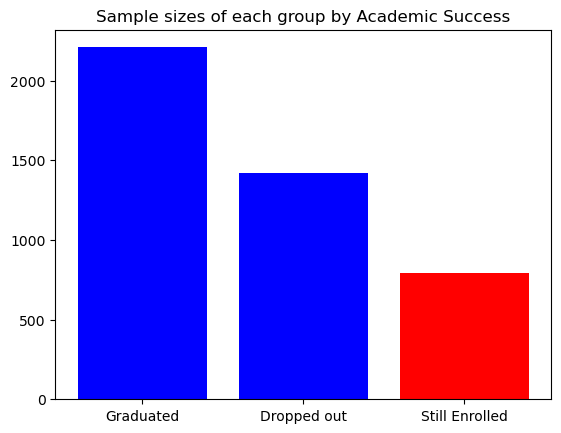

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

capstone_df = pd.read_csv('dataset.csv')

#capstone_df.info()
credit_hours_enrolled = capstone_df['Curricular units 1st sem (enrolled)']
academic_success = capstone_df['Target']

#df = pd.concat([credit_hours_enrolled, academic_success], axis=1)
#print(df['Curricular units 1st sem (enrolled)'].mean())
#print(df['Curricular units 1st sem (enrolled)'].median())
#print(df['Curricular units 1st sem (enrolled)'].mode())

#Setting values for counts of Graduate, Dropout, Enrolled
u = 0
v = 0
w = 0
#Using 'for' loop to add to 'u','v', and 'w' count variables
for outcome in academic_success:
    if outcome == 'Graduate':
        u += 1
    elif outcome == 'Dropout':
        v += 1
    elif outcome == 'Enrolled':
        w += 1
    else:
        continue

#Creating arrays of how many counted with its respective variable
y = [u,v,w]
x = ['Graduated', 'Dropped out', 'Still Enrolled']
#Creating Bar Chart
plt.bar(x, y, color= ['blue', 'blue', 'red'])
plt.title('Sample sizes of each group by Academic Success')

current_sample_size = u + v
print(f"The dataset contains {current_sample_size} students that qualify for my study.")
print(w)

[180 7 9 10 21 1010 1910 656 296 36 52 45 66 20 22 25 13 16 19 2 0 6 0 2 0
 0]


The amount of students that enrolled from 5 to 7 hours in their first semester is 81%


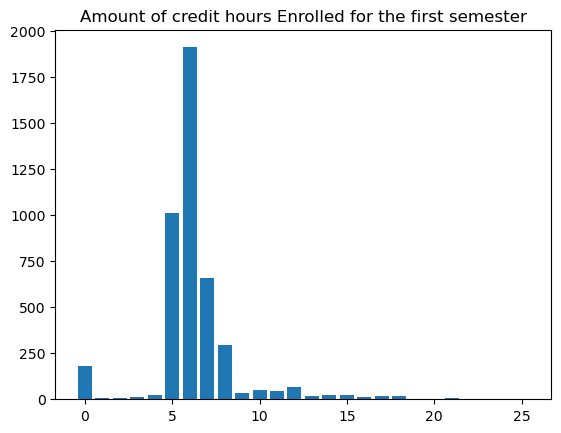

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

capstone_df = pd.read_csv('dataset.csv')

#capstone_df.info()
credit_hours_enrolled = capstone_df['Curricular units 1st sem (enrolled)']

#Creating array range for credit hour varibles
max_hours = credit_hours_enrolled.max()
min_hours = credit_hours_enrolled.min()

#Creating array for x-axis
a = []
for num in range(min_hours, max_hours, 1):
    a.append(num)

#Creating empty array to add the credit hours to, will become y-axis
b = np.zeros(max_hours,dtype= list)

#for loop to add to empty credit hour array 'b'
for hours in credit_hours_enrolled:
    for num in a:
        if hours == num:
            b[num] += 1
        else:
            continue

print(b)
plt.bar(a,b)
plt.title('Amount of credit hours Enrolled for the first semester')
#Addressing distribution of data
sum_of_567 = b[5] + b[6] + b[7]
sum_of_all = sum(b)
percent_all_thats_567 = sum_of_567 / sum_of_all
convert_pat567 = int(round(100*percent_all_thats_567,0))
print(f"The amount of students that enrolled from 5 to 7 hours in their first semester is {convert_pat567}%")


<BarContainer object of 3 artists>

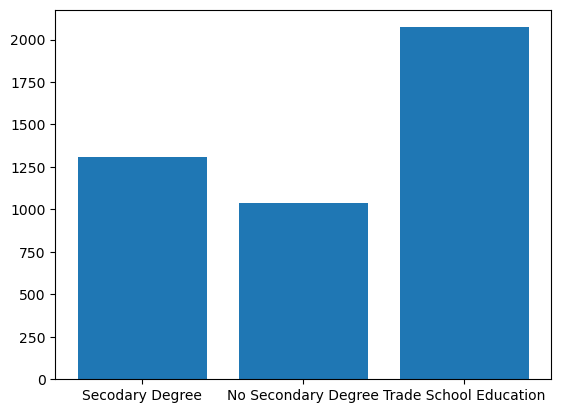

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

capstone_df = pd.read_csv('dataset.csv')

#Creating arrays with mother and father educations
mom_education = capstone_df['Mothers qualification']
dad_education = capstone_df['Fathers qualification']

#Creating limits of range for arrays 
max_momed = max(mom_education)
min_ed = min(mom_education)
max_daded = max(dad_education)

#Creating array for the converted numerical data of the mom and dad eduction
c = ['Secodary Degree','No Secondary Degree', 'Trade School Education']

#Creating empty array to separate each value to create x-axis of bar chart with each value
d = []
for num in range(0, max_momed, 1):
    d.append(num)
#Had to create a separate empty array for dad education as it is a different length to the mom education    
dd = []
for num in range(0, max_daded, 1):
    dd.append(num)

#Creating empty arrays to add to while using a 'for' loop
e = np.zeros(max_momed, dtype= list)
f = np.zeros(max_daded, dtype= list)

#For loop to add the mom array named 'e'
for ed in mom_education:
    for num in d:
        if ed == num:
            e[num] += 1

#For loop to add the dad array named 'f'
for ed in dad_education:
    for num in dd:
        if ed == num:
            f[num] += 1

#Creating empty arrays to add while using 'for' loop
g = np.zeros(3, dtype= list)
h = np.zeros(3, dtype= list)

#Adding to the mom array for categorical values
for ed in e:
    for num in d:
        if num <= 5:
            g[0] += e[num]
        elif num >= 6 and num <= 19:
            g[1] += e[num]
        elif num >= 20:
            g[2] += e[num]
        else:
            continue
    break

#Adding to the mom array for categorical values
for ed in f:
    for num in dd:
        if num <= 5:
            h[0] += f[num]
        elif num >= 6 and num <= 19:
            h[1] += f[num]
        elif num >= 20 and num < 35:
            h[2] += f[num]
        else:
            continue
    break

#Number check to make sure all values are accounted for
#print(g)
#print(h)
#print(sum(g))
#print(sum(h))

#Bar chart of mom education by each numerical value
#plt.bar(d,e)

#Bar chart of dad education by each numerical value
##plt.bar(dd,f)

#Bar Chart of Mom Education by categorical value
#plt.bar(c,g)

#Bar Chart of Dad Education by categorical value
plt.bar(c,h)

[837, 475, 567, 406, 805, 540]


<BarContainer object of 6 artists>

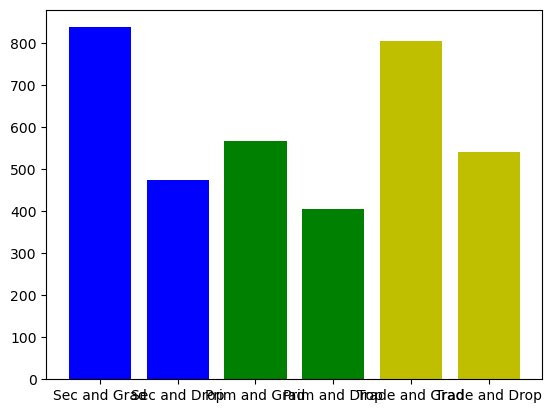

In [2]:
#Combining Academic Success and Mom Education
#converting mom education 
#Creating empty array for conversion
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

capstone_df = pd.read_csv('dataset.csv')

mom_education = capstone_df['Mothers qualification']
academic_success = capstone_df['Target']
mom_cat = []

#using for loop to add to 'mom_cat' array
for num in mom_education:
    if num <= 5:
        mom_cat.append('Secondary Education')
    elif num >= 6 and num <= 19:
        mom_cat.append('Primary Education')
    elif num >= 20:
        mom_cat.append('Trade School Education')
    else:
        continue

#Checking to see that the two arrays are of the same length
#print(len(mom_cat))
#print(len(academic_success))

#Combining the lists to drop out enrolled variables

mom_edu = pd.Series(mom_cat)
acad_succ = pd.Series(academic_success)
mom_acad = pd.concat([mom_edu, acad_succ], axis = 1)
#print(mom_acad)
mom_acad_copy = mom_acad.copy()


mom_acad_copy = mom_acad_copy.drop(mom_acad_copy[mom_acad_copy['Target'] == 'Enrolled'].index)    

mom_acad_copy.to_csv('../Capstone/mom_and_target.csv')
m = mom_acad_copy[0]
n = mom_acad_copy['Target']

#Got values from SQL, couldn't get a nested loop to output accurately
o = 837
p = 475
q = 567
r = 406
s = 805
t = 540

# for item in m:
#     if item == 'Secondary Education':
#         for target in n:
#             if target == 'Graduate':
#                 o += 1
#             else:
#                 p += 1
#     elif item == 'Primary Education':
#         for target in n:
#             if target == 'Graduate':
#                 q += 1
#             else:
#                 r += 1
#     elif item == 'Trade School Education':
#         for target in n:
#             if target == 'Graduate':
#                 s += 1
#             else:
#                 t += 1

    

        


y_axis = [o,p,q,r,s,t]
x_axis = ['Sec and Grad', 'Sec and Drop', 'Prim and Grad', 'Prim and Drop', 'Trade and Grad', 'Trade and Drop']
colors = ['b', 'b', 'g', 'g', 'y', 'y']
print(y_axis)
plt.bar(x_axis,y_axis, color = colors)



